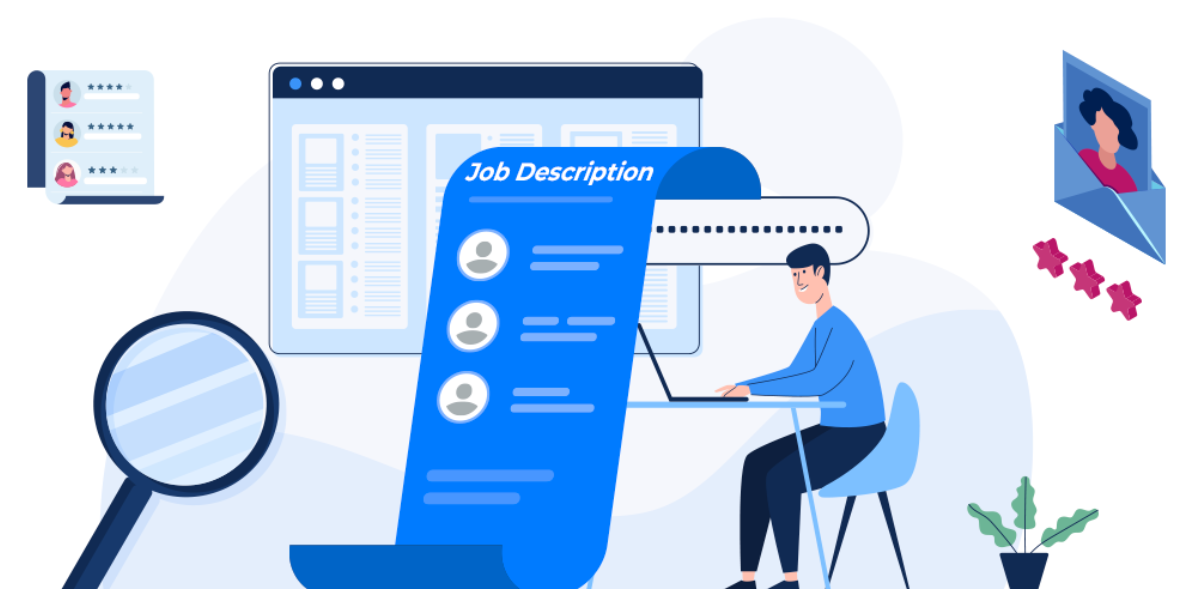

# Import Essential Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
import string

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 1. Read & Data Acquisition

In [3]:
df = pd.read_csv("job_title_des.csv")
df.head()

,Unnamed: 0,Job Title,Job Description
0,0,Flutter Developer,We are looking for hire experts flutter develo...
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n..."
3,3,iOS Developer,JOB DESCRIPTION:\n\nStrong framework outside o...
4,4,Full Stack Developer,job responsibility full stack engineer – react...


In [4]:
## Drop unnecessary column
df.drop("Unnamed: 0",axis = 1, inplace = True)

In [5]:
## Now, Again we'll read the dataset
df.head()

,Job Title,Job Description
0,Flutter Developer,We are looking for hire experts flutter develo...
1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n..."
3,iOS Developer,JOB DESCRIPTION:\n\nStrong framework outside o...
4,Full Stack Developer,job responsibility full stack engineer – react...


In [6]:
# shape of the dataset

row, col = df.shape
print("Row :=> ",row,"\nColumn :=>",col)

Row :=>  2277 
Column :=> 2


In [11]:
# No of unique words

df['Job Title'].value_counts()

Job Title
JavaScript Developer      166
Java Developer            161
Software Engineer         160
Node js developer         160
iOS Developer             159
PHP Developer             156
Flutter Developer         155
DevOps Engineer           155
Django Developer          152
Machine Learning          152
Backend Developer         147
Network Administrator     145
Database Administrator    139
Full Stack Developer      138
Wordpress Developer       132
Name: count, dtype: int64

In [12]:
# Check missing value
df.isnull().sum()

Job Title          0
Job Description    0
dtype: int64

# 2. Text Preprocessing

# Basic Preprocessing

In [13]:
# Apply lowercase transformation to the 'Job Description' column

def clean_text(text):
    text = text.lower()    
    return text

In [14]:
df['Job Description'] = df['Job Description'].apply(clean_text)

In [15]:
df['Job Description'][0]

'we are looking for hire experts flutter developer. so you are eligible this post then apply your resume.\njob types: full-time, part-time\nsalary: ₹20,000.00 - ₹40,000.00 per month\nbenefits:\nflexible schedule\nfood allowance\nschedule:\nday shift\nsupplemental pay:\njoining bonus\novertime pay\nexperience:\ntotal work: 1 year (preferred)\nhousing rent subsidy:\nyes\nindustry:\nsoftware development\nwork remotely:\ntemporarily due to covid-19'

# Remove Punctuation

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
punctuation = string.punctuation + "\n"

In [18]:
exclude = punctuation

In [19]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text

In [20]:
df['Job Description'] = df['Job Description'].apply(remove_punc)

In [21]:
df['Job Description'][0]

'we are looking for hire experts flutter developer so you are eligible this post then apply your resumejob types fulltime parttimesalary ₹2000000  ₹4000000 per monthbenefitsflexible schedulefood allowancescheduleday shiftsupplemental payjoining bonusovertime payexperiencetotal work 1 year preferredhousing rent subsidyyesindustrysoftware developmentwork remotelytemporarily due to covid19'

# Stopwords Removing

In [22]:
english_stopwods = stopwords.words('english')
print(english_stopwods)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word not in stopwords.words('english'):
            new_text.append(word)
            
    return " ".join(new_text)

In [24]:
df['Job Description'] = df['Job Description'].apply(remove_stopwords)

In [25]:
df['Job Description'][0]

'looking hire experts flutter developer eligible post apply resumejob types fulltime parttimesalary ₹2000000 ₹4000000 per monthbenefitsflexible schedulefood allowancescheduleday shiftsupplemental payjoining bonusovertime payexperiencetotal work 1 year preferredhousing rent subsidyyesindustrysoftware developmentwork remotelytemporarily due covid19'

# Word Tokenization

In [26]:
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

In [27]:
df['Job Description'] = df['Job Description'].apply(tokenization)

In [28]:
## we'll make a array of Text and language

x = np.array(df['Job Description'])
y = np.array(df['Job Title'])

In [29]:
x = [str(item) for item in x] # converting into string

In [30]:
x = [text for text in x if text]  # Remove empty strings or None

In [31]:
cv = CountVectorizer()
X = cv.fit_transform(x)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.33,random_state = 42)

# Build Model

In [33]:
# We'll make model
# Train the MultinomialBNB models
# Multinomaial => The multinomial Naive Bayes classifier is suitable for classification with discrete features.
# (e.g., word counts for text classification)

model = MultinomialNB()

model.fit(X_train,y_train)

MultinomialNB()

In [34]:
# We'll Initialize The  Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
# We'll Initialize The LogisticRegression model
Log_Reg = LogisticRegression()

# Train the model

Log_Reg.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# Initialize the Random Forest
Random_Forest = RandomForestClassifier()

Random_Forest.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
# Initialize the Support Vector Classifier 

Svc = SVC()

Svc.fit(X_train,y_train)

SVC()

In [38]:
# Initialize the KNeighborsClassifier

KNN = KNeighborsClassifier()

KNN.fit(X_train,y_train)

KNeighborsClassifier()

# Evaluation

In [40]:
# Accuracy of models

print("Accuracy of MultinomialNB :==> ",model.score(X_test,y_test))
print("Accuracy of Decision Tree Classifier :==> ",dt_model.score(X_test,y_test))
print("Accuracy of Logistic Regression :==> ",Log_Reg.score(X_test,y_test))
print("Accuracy of Random Forest Classifier :==>",Random_Forest.score(X_test,y_test))
print("Accuracy of Support Vector Classifier :==>",Svc.score(X_test,y_test))
print("Accuracy of KNeighborsClassifier",KNN.score(X_test,y_test))

Accuracy of MultinomialNB :==>  0.7047872340425532
Accuracy of Decision Tree Classifier :==>  0.5851063829787234
Accuracy of Logistic Regression :==>  0.785904255319149
Accuracy of Random Forest Classifier :==> 0.7460106382978723
Accuracy of Support Vector Classifier :==> 0.699468085106383
Accuracy of KNeighborsClassifier 0.46143617021276595


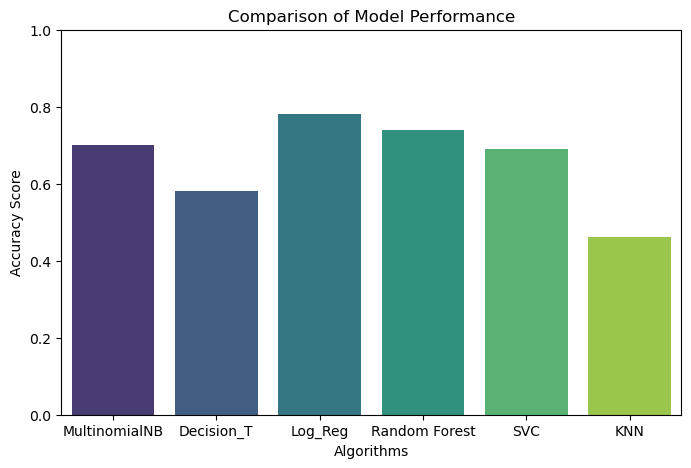

In [48]:
import matplotlib.pyplot as plt
# Model names
models = ['MultinomialNB','Decision_T','Log_Reg','Random Forest','SVC','KNN']

# Corresponding accuracy scores (example values)
accuracy_scores = [0.70,0.58,0.78,0.74,0.69,0.46]

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy_scores, palette="viridis")

# Add labels and title
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Performance")
plt.ylim(0, 1)  # Ensure y-axis is between 0 and 1
plt.show()

In [45]:
# Users will give Input and now we'll predict the Job Title

user = input("Enter a text:--> ")
data = cv.transform([user]).toarray()

output = model.predict(data)
print(output)

Enter a text:--> I want to do job and I want highest Package
['Full Stack Developer']
